In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from polynomial import PolynomialFeature
from utils import rmse
from linear_regression import LinearRegression
%matplotlib inline

In [2]:
df_X= pd.read_csv('dataset/data_X.csv')

In [3]:
# GRE score, TOFEL score, University rating, SOP, LOR, CGPA, Research as the input
input = ['GRE_score', 'TOFEL_score', 'University_rating', 'SOP', 'LOR ', 'CGPA', 'Research']
print(df_X.shape)
df_X[input][0:10]

(500, 8)


,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
5,330,115,5,4.5,3.0,9.34,1
6,321,109,3,3.0,4.0,8.20,1
7,308,101,2,3.0,4.0,7.90,0
8,302,102,1,2.0,1.5,8.00,0
9,323,108,3,3.5,3.0,8.60,0


In [4]:
df_Y= pd.read_csv('dataset/data_T.csv')

ans = ['Chance_of_Admit ']
print(df_Y.shape)
df_Y[ans][0:10]

(500, 2)


,Chance_of_Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
5,0.90
6,0.75
7,0.68
8,0.50
9,0.45


In [5]:
df_X['Chance_of_Admit '] = df_Y[ans]
msk = np.random.rand(len(df_X)) < 0.8
train = df_X[msk]
test = df_X[~msk]

In [6]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

# 2.1.a

## M=2

In [10]:
feature = PolynomialFeature(2)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [11]:
y_pred = model.predict(X_test)

In [12]:
list_x = np.linspace(0, 1, test.shape[0])

In [13]:
y_test.shape

(108, 1)

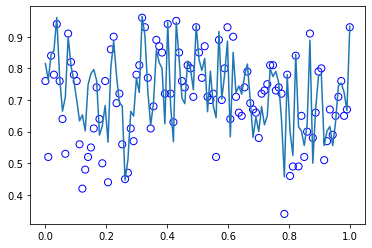

In [14]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [15]:
print('rmse result:', rmse(y_test, y_pred))

rmse result: 0.07504640241983745


## M=1

In [16]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [17]:
feature = PolynomialFeature(1)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [18]:
y_pred = model.predict(X_test)

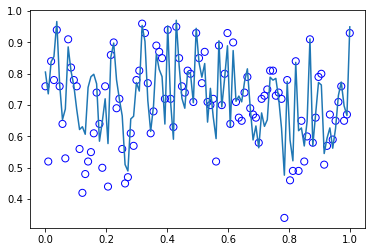

In [19]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [20]:
print('rmse result:', rmse(y_test, y_pred))

rmse result: 0.07143550405823319


## 2.1.a result
Look like M=2 is better than M=1, because more degree can fit more data but when degree bigger which will happend overfitting

# 2.1.b

In my observation, I found CGPA is the best contributive feature, we can find in:

In [21]:
df_X[0:2]

,Serial_id,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76


0 and 1 have the same eigenvalues, except for CGPA, but the results are very different.

That see another example:

In [22]:
df_X[5:7]

,Serial_id,GRE_score,TOFEL_score,University_rating,SOP,LOR,CGPA,Research,Chance_of_Admit
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75


We can draw the plot show CGPA and score

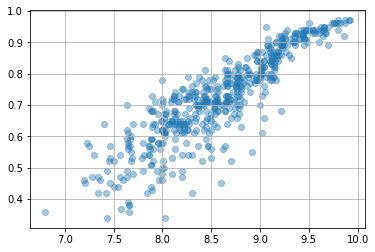

In [23]:
plt.scatter(df_X['CGPA'],df_X['Chance_of_Admit '],  
            alpha = 0.4, cmap = 'Reds')
plt.grid()

In [7]:
X_train = train['CGPA'].to_numpy()
X_test = test['CGPA'].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [8]:
feature = PolynomialFeature(1)

X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [9]:
y_pred = model.predict(X_test)

In [10]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

NameError: name 'list_x' is not defined

In [28]:
print('rmse result:', rmse(y_test, y_pred))

rmse result: 0.07747745246220153


# 2.1.b result

However rms error is higher than pervious, but we just use one feature can get this performance

this result is prove CGPA is most contributive feature.

# 2.2.a result
I think gaussian bais function do the better

In [48]:
from Gaussian import GaussianFeature

In [49]:
X_train = train[input].to_numpy()
X_test = test[input].to_numpy()
y_train = train[ans].to_numpy()
y_test = test[ans].to_numpy()

In [50]:
X_train.mean()
X_train.var()

11993.029415389841

In [51]:
list_x = np.linspace(0, 1, test.shape[0])

In [52]:
X_test.shape

(94, 7)

In [53]:
feature  = GaussianFeature(7)
feature.fit(X_train)
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

In [54]:
X_test.shape

(94, 7)

In [55]:
y_pred = model.predict(X_test)

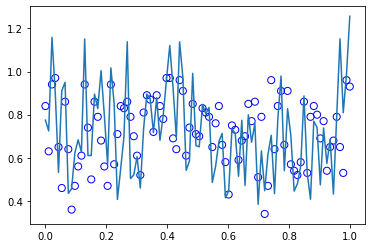

In [56]:
plt.scatter(list_x, y_test, facecolor="none", edgecolor="b", s=50, label="training data")
plt.plot(list_x, y_pred)

In [57]:
print('rmse result:', rmse(y_test, y_pred))

rmse result: 0.16179099614741257
